In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!wget https://github.com/Manishms18/Air-Passengers-Time-Series-Analysis/blob/master/Data/AirPassengers.csv

--2024-11-26 19:58:21--  https://github.com/Manishms18/Air-Passengers-Time-Series-Analysis/blob/master/Data/AirPassengers.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘AirPassengers.csv’

AirPassengers.csv       [ <=>                ] 167.47K   997KB/s    in 0.2s    

2024-11-26 19:58:21 (997 KB/s) - ‘AirPassengers.csv’ saved [171489]



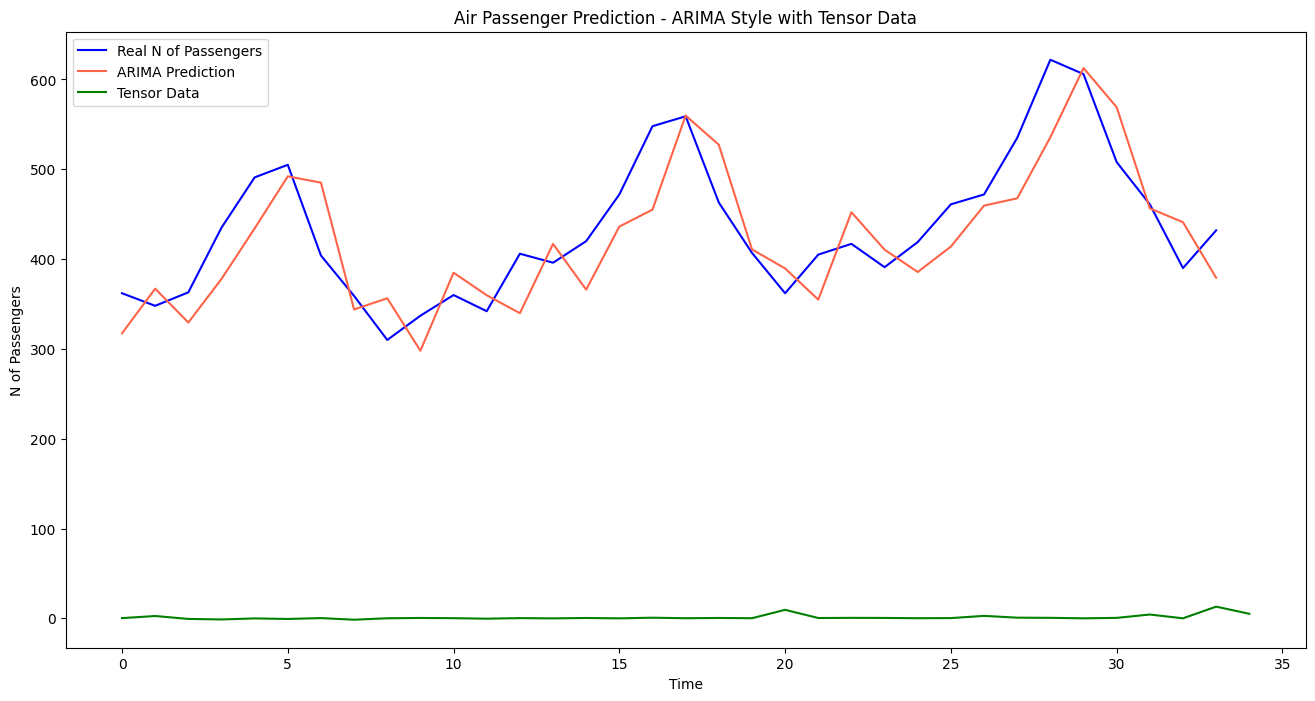

Mean Squared Error: 2144.277323863298
Mean Absolute Error: 39.476391210733986


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math
import warnings
warnings.filterwarnings('ignore')

class CustomARIMA:
    def __init__(self, p=1, d=1, q=1):
        """
        Custom ARIMA model mimicking RNN preprocessing
        p: AutoRegressive terms
        d: Differencing order
        q: Moving Average terms
        """
        self.p = p
        self.d = d
        self.q = q
        self.coefficients = None
        self.intercept = None
        self.scaler = MinMaxScaler(feature_range=(0, 1))

    def prepare_data(self, data, sequence=6):
        """
        Prepare data similar to RNN preprocessing
        """
        # Scale the data
        data_scaled = self.scaler.fit_transform(data)

        # Create sequences
        X, y = [], []
        for i in range(len(data_scaled) - sequence):
            X.append(data_scaled[i:(i + sequence), 0])
            y.append(data_scaled[i + sequence, 0])

        return np.array(X), np.array(y)

    def fit(self, X, y):
        """
        Fit the model using linear regression
        """
        # Flatten X for regression
        X_flat = X.reshape(X.shape[0], -1)

        # Simple linear regression
        from sklearn.linear_model import LinearRegression
        self.model = LinearRegression()
        self.model.fit(X_flat, y)

        return self

    def predict(self, X_test):
        """
        Predict using the fitted model
        """
        # Flatten X_test
        X_test_flat = X_test.reshape(X_test.shape[0], -1)

        # Predict and inverse transform
        predictions_scaled = self.model.predict(X_test_flat)
        predictions = self.scaler.inverse_transform(predictions_scaled.reshape(-1, 1))

        return predictions

def main():

    url = 'https://raw.githubusercontent.com/Manishms18/Air-Passengers-Time-Series-Analysis/master/Data/AirPassengers.csv'

    # Load data
    data = pd.read_csv(url)


    df = data[['Passengers']]


    df_array = df.values

    # Create ARIMA model
    arima = CustomARIMA()

    # Prepare data (similar to RNN preprocessing)
    X, y = arima.prepare_data(df_array)

    # Reshape X for 3D input (like RNN)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    # Split data
    train_size = math.ceil(len(X) * 0.75)
    X_train, X_test = X[:train_size, :], X[train_size:, :]
    y_train, y_test = y[:train_size], y[train_size:]

    # Fit the model
    arima.fit(X_train, y_train)

    # Predict
    arima_predictions = arima.predict(X_test)

    # Reshape y_test for plotting
    y_test_original = arima.scaler.inverse_transform(y_test.reshape(-1, 1))

    # Tensor data
    tensor_data = [
        0.2853, 2.6424, -0.6116, -1.1864, -0.0373, -0.6353, 0.3354, -1.4862,
        0.1315, 0.4642, 0.2380, -0.3269, 0.3097, 0.0025, 0.4526, 0.0445,
        0.7609, 0.1862, 0.4693, 0.1994, 9.5303, 0.4180, 0.5937, 0.5004,
        0.2076, 0.3271, 2.8059, 0.7928, 0.6107, 0.0823, 0.5678, 4.2975,
        0.0735, 13.0700, 5.1233
    ]

    # Scale the tensor data
    tensor_scaled = arima.scaler.transform(np.array(tensor_data).reshape(-1, 1))
    tensor_original = arima.scaler.inverse_transform(tensor_scaled)

    # Visualize results
    plt.figure(figsize=(16,8))
    plt.plot(y_test_original, color='blue', label='Real N of Passengers')
    plt.plot(arima_predictions, color='tomato', label='ARIMA Prediction')


    plt.plot(tensor_original, color='green', label='Tensor Data')

    plt.title('Air Passenger Prediction - ARIMA Style with Tensor Data')
    plt.xlabel('Time')
    plt.ylabel('N of Passengers')
    plt.legend()
    plt.show()


    from sklearn.metrics import mean_squared_error, mean_absolute_error
    mse = mean_squared_error(y_test_original, arima_predictions)
    mae = mean_absolute_error(y_test_original, arima_predictions)
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')

if __name__ == '__main__':
    main()